# Python Decorators

## Inhalt
* [Decoraters](#Decoraters)
* [Interaktive grafische Elemente](#Interaktive-grafische-Elemente)
* [interact - ipywidgets](#interact---ipywidgets)
* [Interaktive Taylorfunktion](#Interaktive-Taylorfunktion)
* [Kochsche Kurven](#Kochsche-Kurven)
* [Mandelbrot-Menge](#Mandelbrot-Menge)


### Decorators
<br />Decorators sind Funktionen, die gegebene Funktionen ab&auml;ndern und/oder etwas vor und/oder nach der eigentlichen Funktion ausf&uuml;hren k&ouml;nnen. Sie geben eine Funktion zur&uuml;ck.  

Einschub: Funktions-meta-variablen

In [1]:
def testfunktion(a):
    """eine Testfunktion """
    print ("Funktionsaufruf mit Argument: {}".format(a))
    
print (testfunktion.func_name)
print (testfunktion.func_doc)

testfunktion
eine Testfunktion 


Beispiel Decorator-Funktion:  

In [1]:
def entry(function):
    print ("Arbeit vor dem Aufruf von '{}'".format(function.func_name))
    return function

normale Funktion die mit der Decorator-Funktion <em>entry</em> dekoriert ist.  

```
@decorator-name
funktion():
    ...
```

In [1]:
@entry
def testfunktion(a):
    """eine Testfunktion """
    print ("Funktionsaufruf mit Argument: {}".format(a))

Arbeit vor dem Aufruf von 'testfunktion'


Das ist &auml;quivalent zu  

In [1]:
testfunktion = entry(testfunktion)

Arbeit vor dem Aufruf von 'testfunktion'


Eigentlicher Aufruf der Funktion  

In [1]:
testfunktion(34)

Funktionsaufruf mit Argument: 34


Damit k&ouml;nnen also weitere Eigenschaften oder spezielle Arbeiten vor und nach der als Argument &uuml;bergebenen Funktion ausgef&uuml;hrt werden.  
Man kann damit auch eine v&ouml;llig andere Funktion zur&uuml;ckgeben (das ist z.B. sinnvoll bei Meta-Verarbeitung von Funktionen).  
Beim n&auml;chsten Beispiel definieren wir also eine neue Funktion, die, wenn aufgerufen, unsere alte Funktion <em>func</em> aufruft und deren Argumente ausgibt.  

Hierbei ist

``` python
*args
```

die Liste aller Argumente der Funktion


In [1]:
def arguments(func):
    print ("Gibt die Argumente der Funktion aus")
    def new_func(*args):
        print ("Die Argumente sind: {}".format(args))
        return func(*args)
    return new_func

In [1]:
@arguments
def testfunktion(a,b):
    return a^2+b

Gibt die Argumente der Funktion aus


In [1]:
testfunktion(23,44)

Die Argumente sind: (23, 44)


573

Erweiterung zu Aufruf und Ergebnis-Ausgabe.  

In [1]:
def entryExit(func):
    func.depth=0
    def new_func(*args):
        print (func.depth*"  " + "Funktion{}".format(args))
        func.depth += 1
        result = func(*args)
        func.depth -= 1
        print (func.depth*"  " + "Ergebnis: {}".format(result))
        return result
    return new_func

In [1]:
@entryExit
def y(n):
    if n==0:
        return -1
    if n==1:
        var('a')
        return a
    return 2*y(n-1)-y(n-2)+2
y(4)

Funktion(4,)
  Funktion(3,)
    Funktion(2,)
      Funktion(1,)
      Ergebnis: a
      Funktion(0,)
      Ergebnis: -1
    Ergebnis: 2*a + 3
    Funktion(1,)
    Ergebnis: a
  Ergebnis: 3*a + 8
  Funktion(2,)
    Funktion(1,)
    Ergebnis: a
    Funktion(0,)
    Ergebnis: -1
  Ergebnis: 2*a + 3
Ergebnis: 4*a + 15


4*a + 15

# Interaktive grafische Elemente

In [1]:
from sageplotly import *

## interact - ipywidgets

Hauptfunktion ist der Decorator 

``` python
@interact (<widgets>, __manual=False)
```

Welcher eine Argumentenliste mit den einzelnen Widgets (und deren Variablen-Zuweisung) bekommt. Dann wird die dekorierte Funktion stets aufgerufen, wenn in den widgets was über die grafische Darstellung derselben geändert wird. Mit der Option ```__manual=True``` gibt es stattdessen einen Knopf.

Liste ausgewählter widgets:

* Regler mit Werten von vmin bis vmax:

``` python
IntSlider(value=, min=, max=, step=, description=, continuous_update=)
FloatSlider(value=, min=, max=, step=, description=, continuous_update=)
```
       
* Ein Ankreuzfeld

``` python
Checkbox(description= , value=)
```

* Eine Auswahlliste

``` python
Select(value=, description=, options= )
```        
        
* Ein Dropdown-menu

``` python
Dropdown(value=, description=, options= )
```

* Eine Eingabebox


``` python
Text(description=, value=)
FloatText(description=, value=)
```
       

In [1]:
from ipywidgets import interact, interactive
from ipywidgets import IntSlider

Laden von ipywidgets-Funktionalität

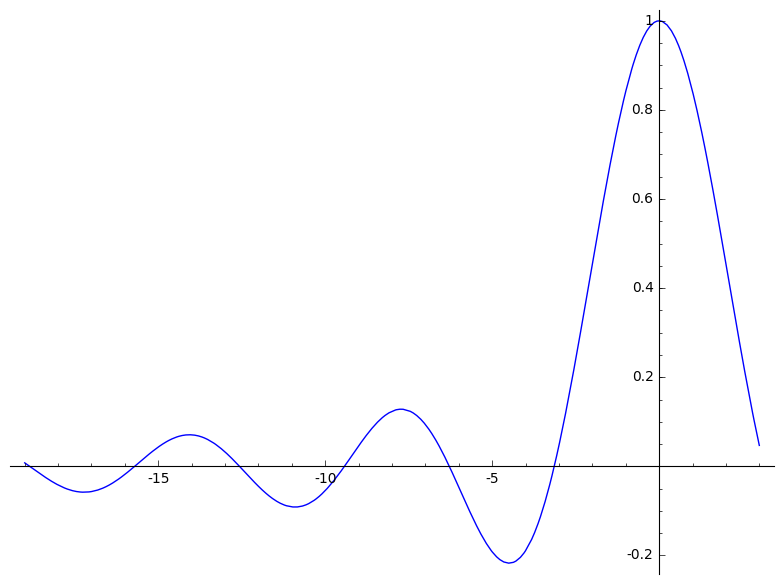

In [1]:
@interact(a = IntSlider(-19, min=-20,max=20), b = IntSlider(3, min=-20,max=20))
def plotter (a=-19,b=3):
    return plot(sin(x)/x, a, b)

### Interaktive Taylorfunktion

In [1]:
from ipywidgets import FloatText

f = sin(x)*e^(-x)
p = plot(f,-1,5, thickness=2)

@interact(order = IntSlider(value=1, min=1, max=12, description='order'),
          x0 = FloatText(value=2, description='Entwicklung'),
          __manual=True)
def tayl(order=1,x0=2):
    ftayl = f.taylor(x,x0,order)
    pt = plot(ftayl,-1, 5, color='green', thickness=2)
    pretty_print(html('$f(x) = {}$'.format(latex(f))))
    pretty_print(html('$f^{0}_{1}(x) = {2} + O(x^{3})$'.format(order,x0,latex(ftayl),order+1)))
    dot = point((x0,f(x=x0)), pointsize=80, rgbcolor=(1,0,0))
    show(dot + p + pt, ymin = -.5, ymax = 1)
    return True
    

Grafiken von einer Abstandsfunktion  

In [1]:
from ipywidgets import Dropdown

colormaps = 'Greys',  'Greens' , 'Bluered',  'Hot', 'Picnic', 'Portland', 'Jet', 'RdBu', 'Blackbody', 'Earth', 'Electric', 'YIOrRd', 'YIGnBu'


@interact(q1 = IntSlider(-1,min=-3,max=3), 
          q2 = IntSlider(-2, min=-3, max=3), 
          cmap = Dropdown(description='colormap', options =sorted(colormaps), value='Greys' ), __manual=True)
def distance(q1=-1, q2=-2, cmap='Greys'):
    var('x,y')
    f = 3*(sin(4*sin(x^2))+sin(5*cos(y)^2)) - q1/sqrt((x+1)^2 + y^2) - q2/sqrt((x-1)^2+(y+0.5)^2)
    ishow3d([plotcontour_ly(f, (x,-2,2), (y,-2,2), plot_points=[40,40], colorscale=cmap)])
    ishow3d([plotdens_ly(f,(x,-2,2), (y,-2,2),plot_points=[40,40],colorscale=cmap)])
    return True   


### Kochsche Kurven

Die Kurve ist im Grenzwert &uuml;berall stetig, aber nirgendwo differenzierbar.  
Konstruktion:  
<ul>
<li>Seien $y_1,y_2$ zwei Punkte im $\mathbb{R}^2$.</li>
<li>Betrachte die Strecke mit Endpunkten $y_1$ und $y_2$.</li>
<li>Ersetze diese Strecke durch 4 Strecken $\overline{y_1 z_1}$, $\overline{z_1 z_2}$, $\overline{z_2 z_3}$,$\overline{z_3 y_2}$ mit Endpunkten</li>
</ul>
$$\begin{eqnarray*}z_1 &=&\frac23 y_1 + \frac13 y_2 z_2 &=& \frac{\sqrt{3}}{6} \left( \begin{array}{cc} 0 & 1 \\ -1 & 0 \end{array} \right) (y_1 - y_2) + \frac12 (y_1 + y_2) z_3 &=&\frac13 y_1 + \frac23 y_2 \end{eqnarray*}$$
<ul>
<li>Dieses Prozedere wird nun f&uuml;r jede einzelne Teilstrecke wiederholt.</li>
</ul>

**sage_eval**

``` python
sage_eval(<str>, locals=dict())
```
Nützliche Funktion in Umfeld von interaktiven Elementen: Führt gegeben ```<str>``` als sage-code aus (so als hätte man es in eine notebook-cell geschrieben). die option ```locals``` lässt einem für diese Auswertung bestimmte Variablen vorweg setzen (z.B. nötig für mathematische Variablen in Ausdrücken)


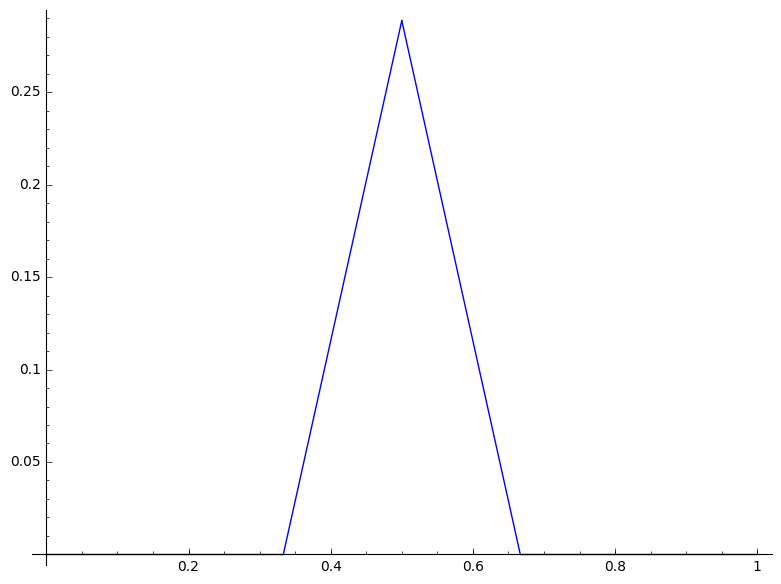

True

In [1]:
from ipywidgets import Text


@interact(y1 = Text(value="[0,0]", description='y1'),
          y2 = Text(value="[1,0]", description='y2'),
          lev = IntSlider(value=1, min=1, max=12, description='level'),
          __manual=True)
def koch(y1, y2, lev):
    y1 = vector(RR,sage_eval(str(y1)))
    y2 = vector(RR,sage_eval(str(y2)))
    show(kochrek(y1,y2,lev))
    return True
    

def kochrek(y1,y2,lev):
    Listelinien = []
    if (lev == 0):
        Listelinien.append(line([(y1[0],y1[1]),(y2[0],y2[1])]))
    else:
        # Definieren der neuen Punkte 
        z1 = 2/3 * y1 + 1/3 * y2
        z3 = 1/3 * y1 + 2/3 * y2
        z2 = sqrt(3)/6*matrix([[0, 1],[ -1, 0]])*(y1-y2) + 1/2 * (y1 + y2)
        # Definieren der 4 Strecken
        Listelinien.append(kochrek(y1, z1, lev-1))
        Listelinien.append(kochrek(z1, z2, lev-1))
        Listelinien.append(kochrek(z2, z3, lev-1))
        Listelinien.append(kochrek(z3, y2, lev-1))
    return add(Listelinien)


#### Mandelbrot-Menge  
Die Mandelbrot-Menge ist die Menge von Punkten $c \in \mathbb{C}$ bei denen die Folge $(z_n)_n$, die durch
$$ z_0:=c, \qquad z_{n+1} = z_n^2 +c, \quad n \in \mathbb{N}$$
definiert ist, beschr&auml;nkt ist.  
Die zu schreibende Funktion <em>mandel()</em> gibt zu $x+iy$ die relative Anzahl der Iterationsschritte zur&uuml;ck.  

In [1]:
from ipywidgets import interact, interactive
from ipywidgets import IntSlider
def mandel (x,y):
    c = (x + I*y).n()
    z = c
    it = 0
    max_it = 50
    while abs(z) <2 and it < max_it :
        z = z^2 + c
        it += 1
    return it

In [1]:
a = plotdens_ly(mandel,(-2.1,1.2),(-1.1,1.1),plot_points=[200,200])

In [1]:
ishow3d([a])